# Average Development

In [144]:
clear all;
close all;

graphics_toolkit("gnuplot");
#graphics_toolkit("fltk");

fignum=1;

## Test-Signals

In [145]:
nos = 500;

### Sine

In [146]:
#Sinus
amp=(2.^31).-1;
fsig=47;
fsample=1499;
ppp=fsample./fsig #Points per Period
periods=nos./ppp
tend=(nos.-1)./fsample
t1=linspace(0,tend,nos);
tsig1 = int32(amp.*sin(2.*pi().*fsig.*t1.+(8./5.*pi())));

ppp =  31.894
periods =  15.677
tend =  0.33289


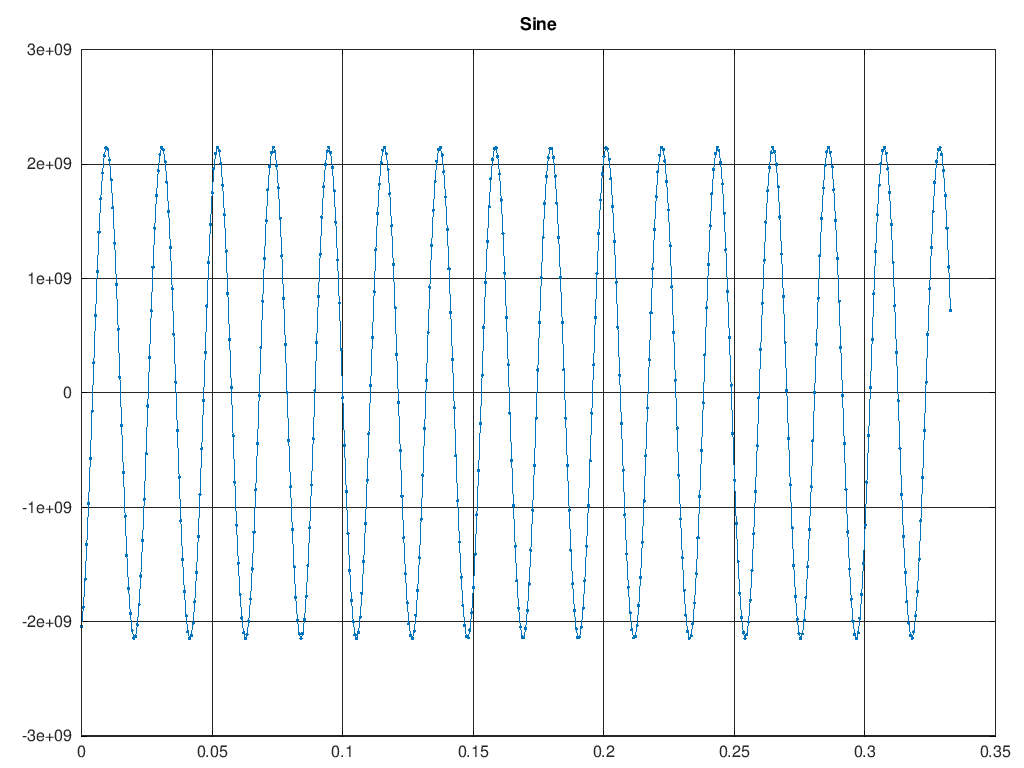

In [147]:
figure(fignum++);
plot(t1,tsig1,". -");
title("Sine");
grid on;

### Noise

In [148]:
#Noise
t2=linspace(0,(nos.-1),nos);
amp=(2.^32).-1;
offset=(2.^31);
tsig2=randi(amp,1,nos).-offset;

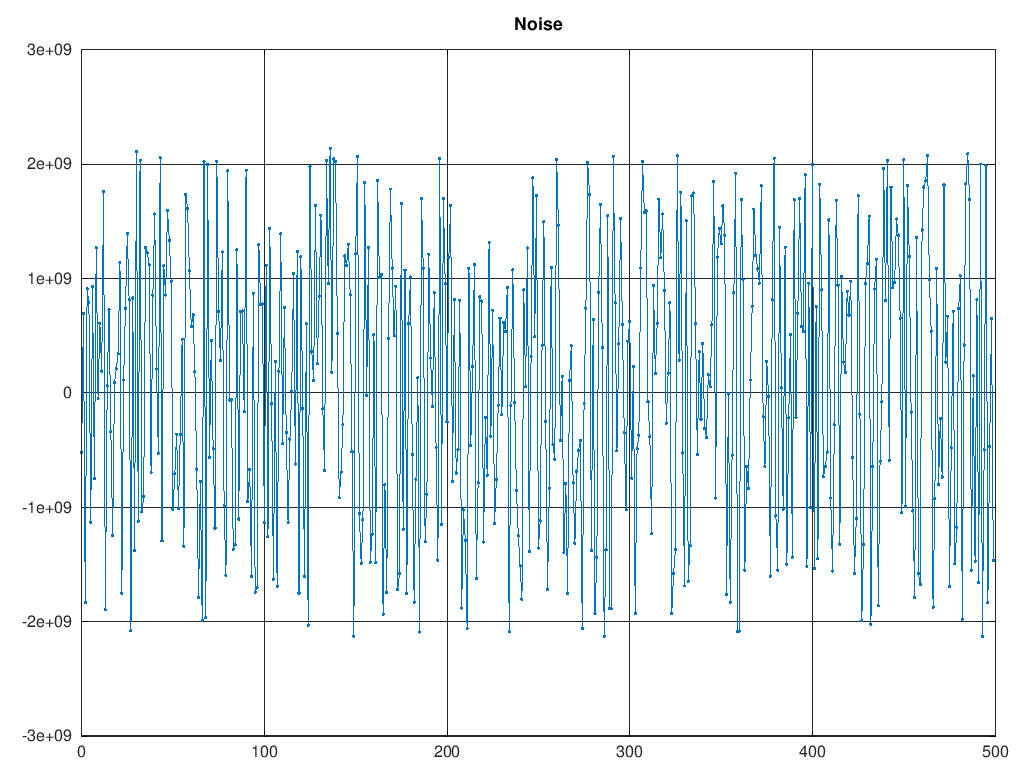

In [149]:
figure(fignum++);
plot(t2,tsig2,". -");
title("Noise");
grid on;

### Ramps

In [150]:
#Ramps
periods=10
t3=linspace(0,(nos.-1),nos);
top=floor(nos./periods);
htop=top./2;
amp=(2.^32).-1;
offset=(2.^31);
tsig3=mod(1:1:nos,top);
modify=mod(1:1:nos,htop);
sel=find(tsig3<htop);
modify(sel)=0;
tsig3=tsig3.-(2.*modify);
tsig3=((amp./htop).*tsig3).-offset;

periods =  10


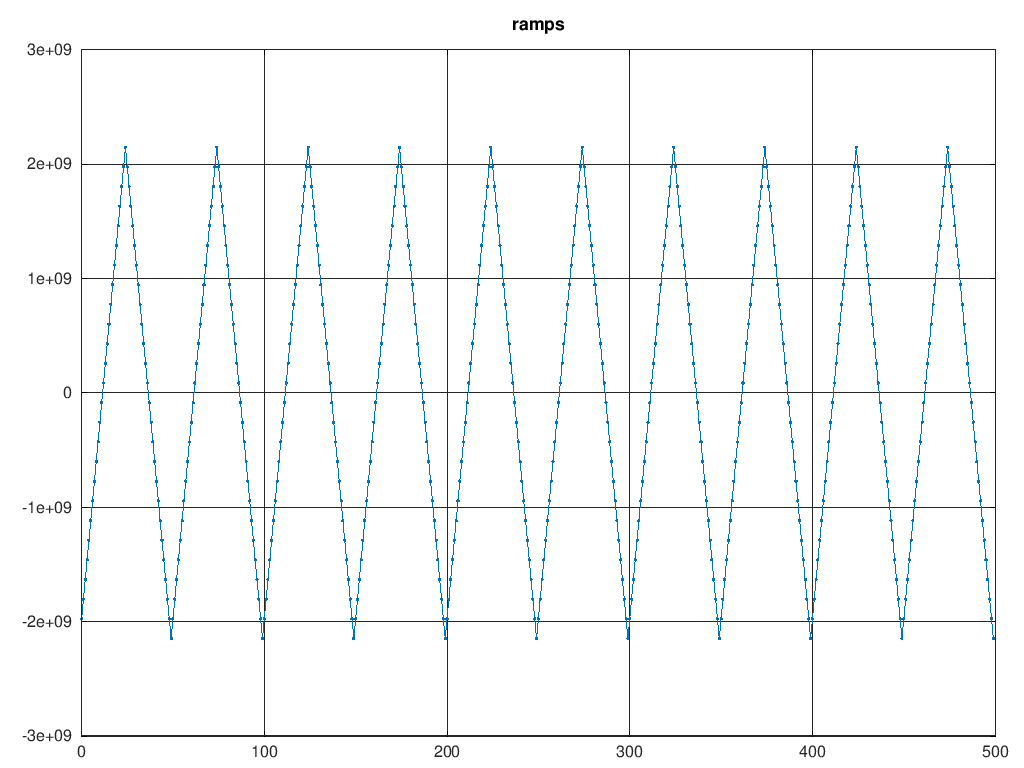

In [151]:
figure(fignum++);
plot(t3,tsig3,". -");
title("ramps");
grid on;

### Rectangular

In [152]:
#rectangles
periods=8
t4=linspace(0,(nos.-1),nos);
top=round(nos./periods);
ctrl=mod(1:1:nos,top);
amp=(2.^32).-1;
offset=(2.^31);
tsig4=zeros(1,nos);
tsig4(find(ctrl>(top./2)))=amp;

periods =  8


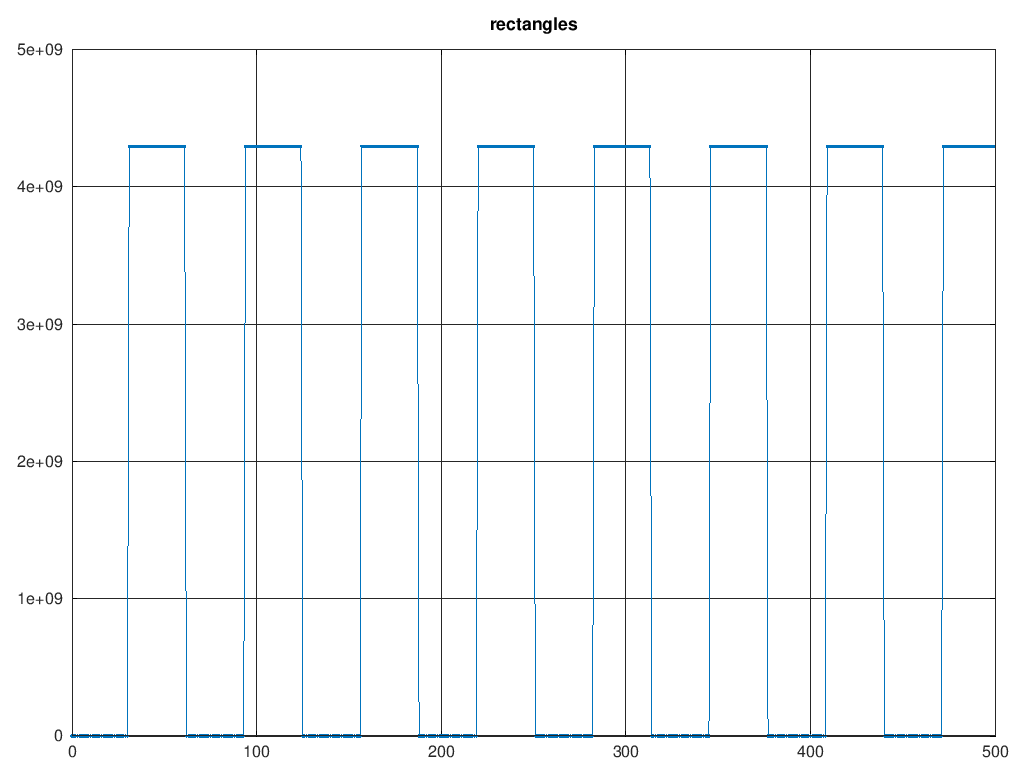

In [153]:
figure(fignum++);
plot(t4,tsig4,". -");
title("rectangles");
grid on;

### Sawtooth

In [154]:
%%file my_sawtooth.m

## p   - Periods
## nos - Number of Samples
function result=my_sawtooth(p,nos)
  range= linspace(1,(nos.-1),nos);
  x = round(nos./p);
  result = mod(range,x)./x;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_sawtooth.m'.


In [155]:
periods=8
t5=linspace(0,(nos.-1),nos);
tsig5=my_sawtooth(periods,nos);

periods =  8


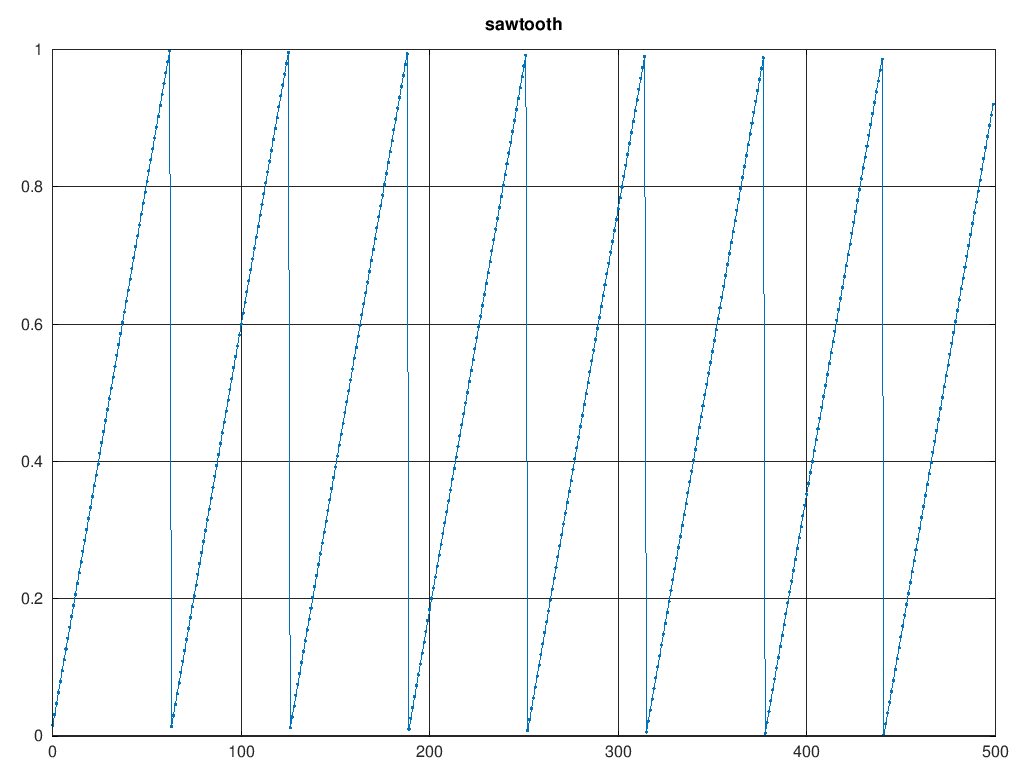

In [156]:
figure(fignum++);
plot(t5,tsig5,". -");
title("sawtooth");
grid on;

### Sinus + Noise

In [157]:
#Sinus + Noise
amp=(2.^31).-1;
fsig=47;
fsample=1499;
pnoise=10 #Percentage of noise
ppp=fsample./fsig #Points per Period
periods=nos./ppp
tend=(nos.-1)./fsample
t6=linspace(0,tend,nos);
noise_amp=round(amp.*pnoise./200);
noise=randi([-noise_amp noise_amp],1,nos);
tsig6 = int32(amp.*sin(2.*pi().*fsig.*t1.+(8./5.*pi())).+noise);

pnoise =  10
ppp =  31.894
periods =  15.677
tend =  0.33289


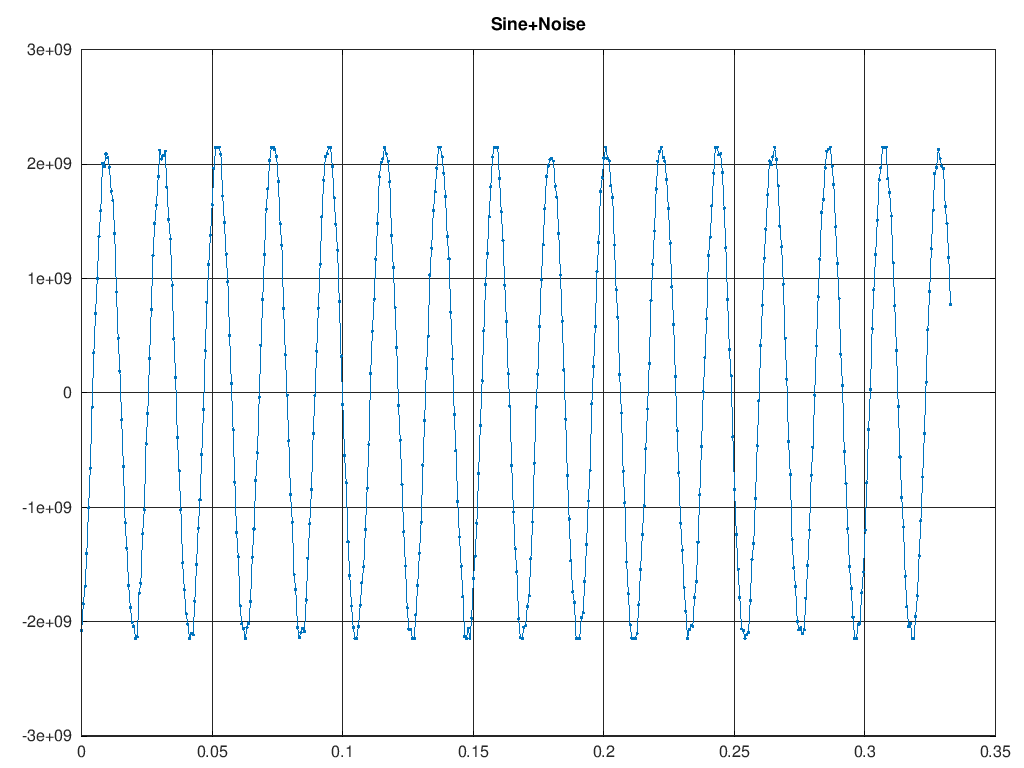

In [158]:
figure(fignum++);
plot(t6,tsig6,". -");
title("Sine+Noise");
grid on;

## Moving Window Average with FiFo

In [198]:
%%file my_movingavrg.m

function result=my_movingavrg(data,window_width);
  nos=length(data);
  fifo = zeros(1,window_width);
  wr_ptr = 1;
  result = zeros(1,nos);
  for(ii=1:1:nos)
    #ii
    fifo(:,wr_ptr) = data(:,ii);
    wr_ptr++;
    if(wr_ptr>window_width) wr_ptr=1;
    endif
    result(:,ii) = sum(fifo)./window_width;
  endfor
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_movingavrg.m'.


In [199]:
#Moving Window Average
window_width = 50;

avg_a = int32(my_movingavrg(tsig1,window_width));
avg_b = int32(my_movingavrg(tsig2,window_width));
avg_c = int32(my_movingavrg(tsig3,window_width));
avg_d = int32(my_movingavrg(tsig4,125));
avg_e = int32(my_movingavrg(tsig5,window_width));
avg_f = int32(my_movingavrg(tsig6,window_width));

### Sine

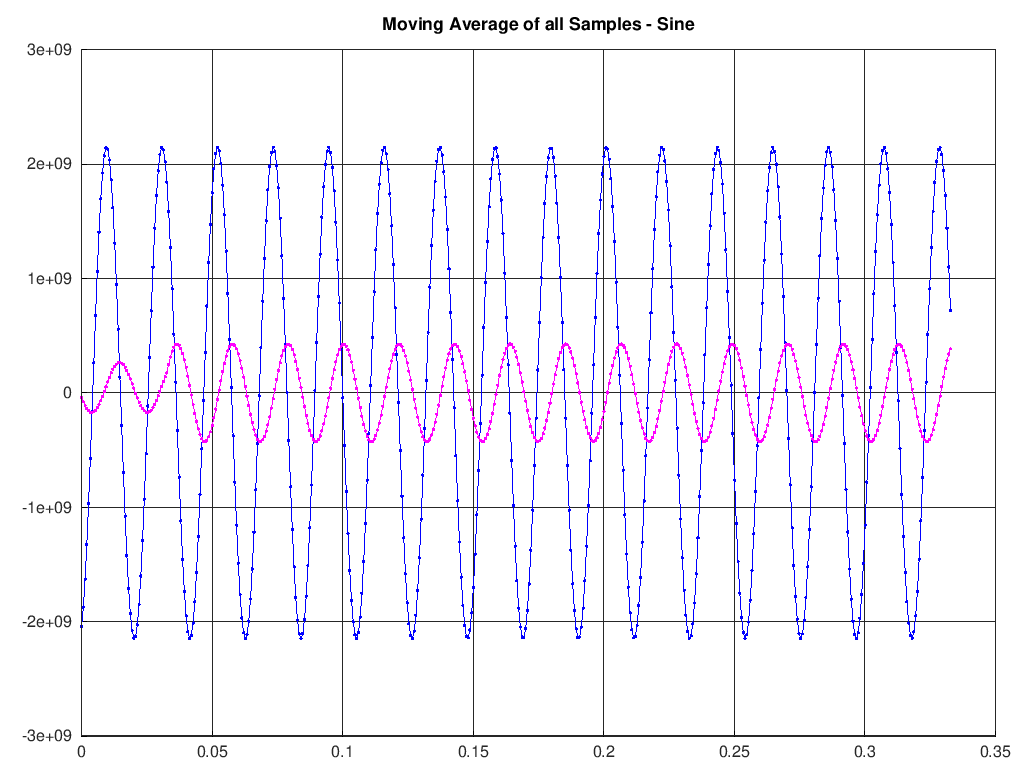

In [200]:
figure(fignum++);
hold on;
plot(t1,tsig1,"- . b");
plot(t1,avg_a,"- . m");
hold off;
title("Moving Average of all Samples - Sine");
grid on;

### Noise

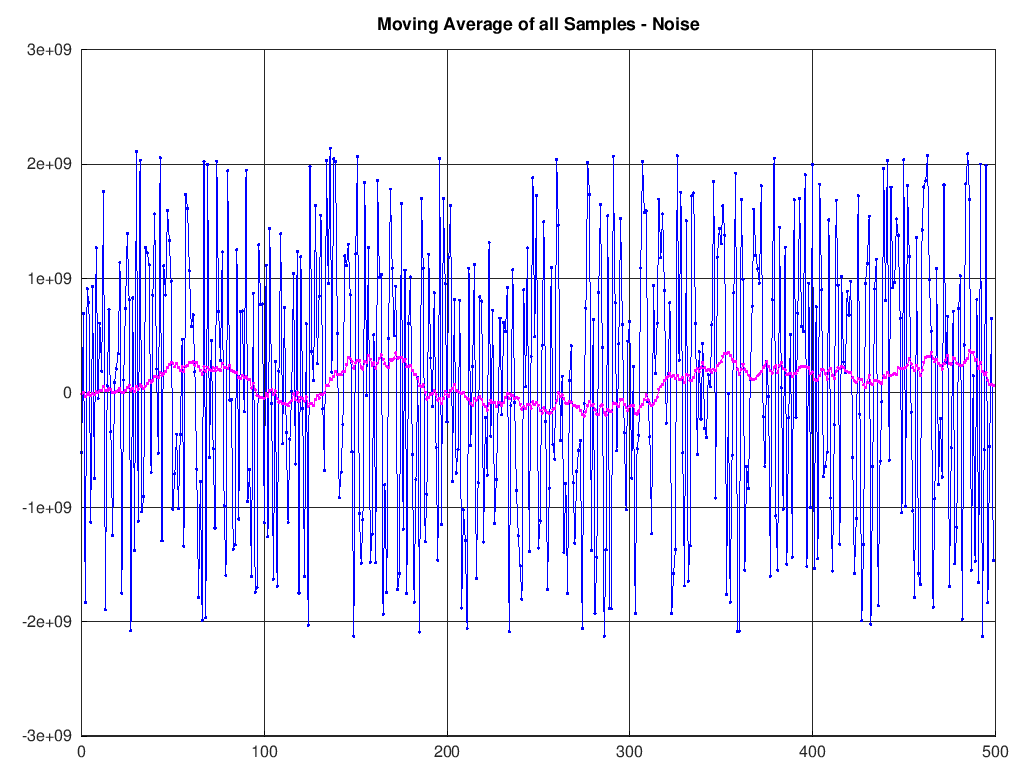

In [201]:
figure(fignum++);
hold on;
plot(t2,tsig2,"- . b");
plot(t2,avg_b,"- . m");
hold off;
title("Moving Average of all Samples - Noise");
grid on;

### Triangles

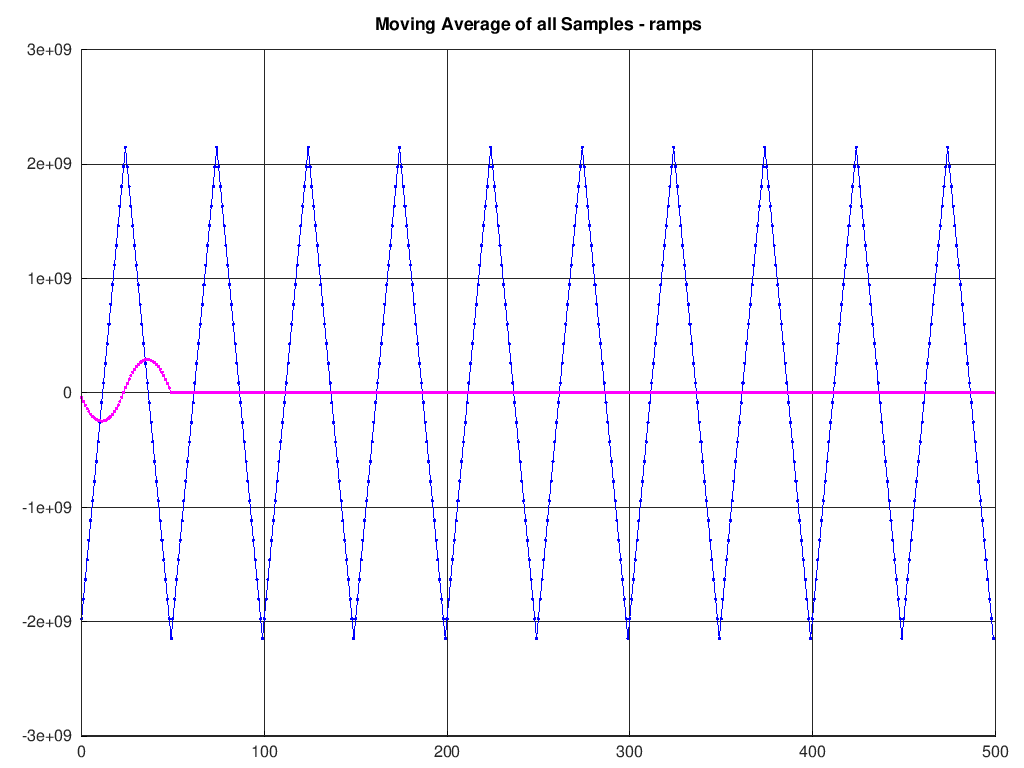

In [202]:
figure(fignum++);
hold on;
plot(t3,tsig3,"- . b");
plot(t3,avg_c,"- . m");
hold off;
title("Moving Average of all Samples - ramps");
grid on;

### Rectangular

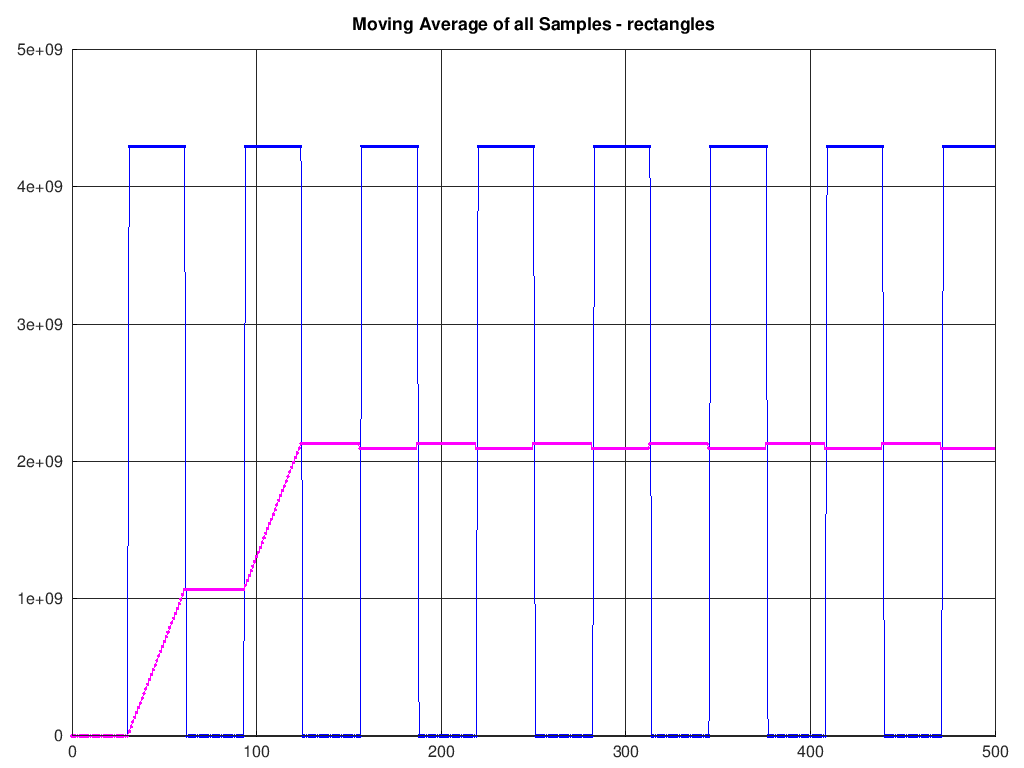

In [203]:
figure(fignum++);
hold on;
plot(t4,tsig4,"- . b");
plot(t4,avg_d,"- . m");
hold off;
title("Moving Average of all Samples - rectangles");
grid on;

### Sawtooth

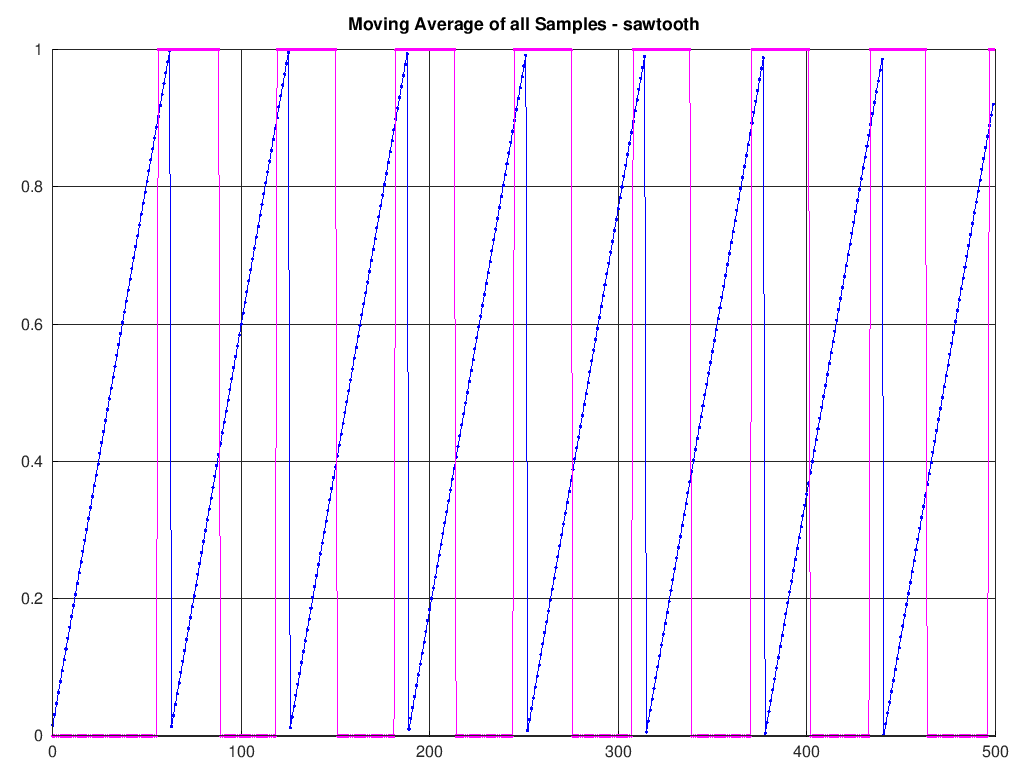

In [204]:
figure(fignum++);
hold on;
plot(t5,tsig5,"- . b");
plot(t5,avg_e,"- . m");
hold off;
title("Moving Average of all Samples - sawtooth");
grid on;

### Sine + Noise

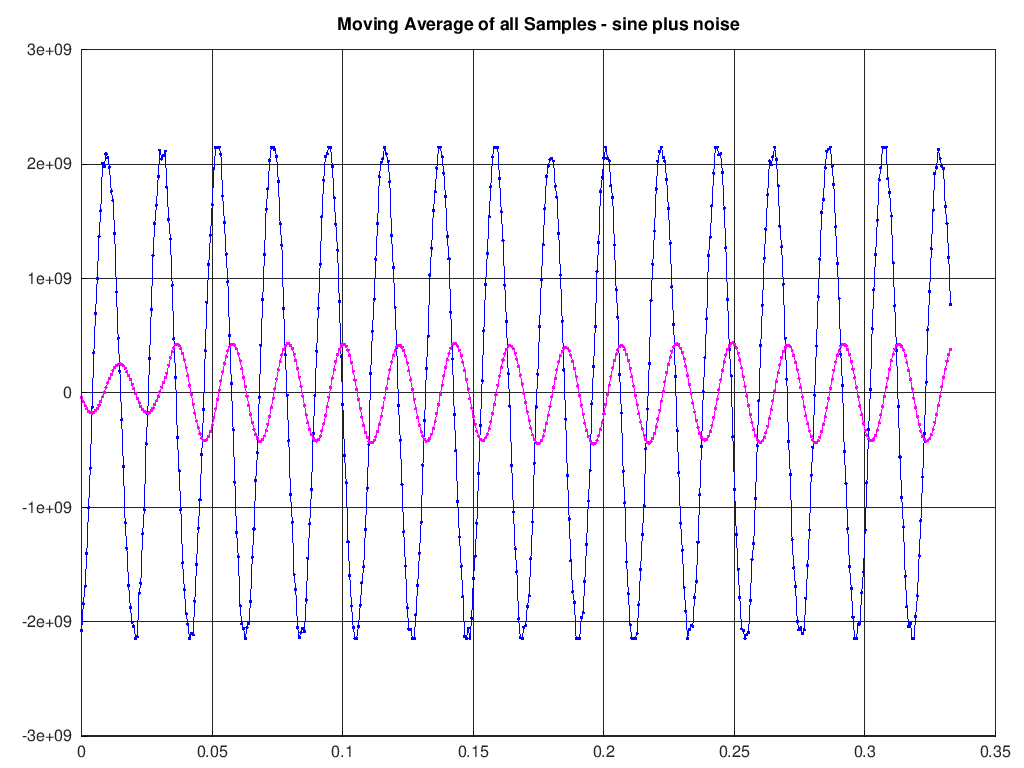

In [205]:
figure(fignum++);
hold on;
plot(t6,tsig6,"- . b");
plot(t6,avg_f,"- . m");
hold off;
title("Moving Average of all Samples - sine plus noise");
grid on;

## Weighted Moving Window Average with FiFo

In [228]:
%%file my_weightedmovingavrg.m

function result=my_weightedmovingavrg(data,window_width,weights);
  nos=length(data);
  fifo = zeros(1,window_width);
  wr_ptr = 1;
  result = zeros(1,nos);
  factor = sum(weights);
  for(ii=1:1:nos)
    #ii
    fifo(:,wr_ptr) = data(:,ii);
    wr_ptr++;
    if(wr_ptr>window_width) wr_ptr=1;
    endif
    result(:,ii) = sum(fifo.*weights)./factor;
  endfor
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_weightedmovingavrg.m'.


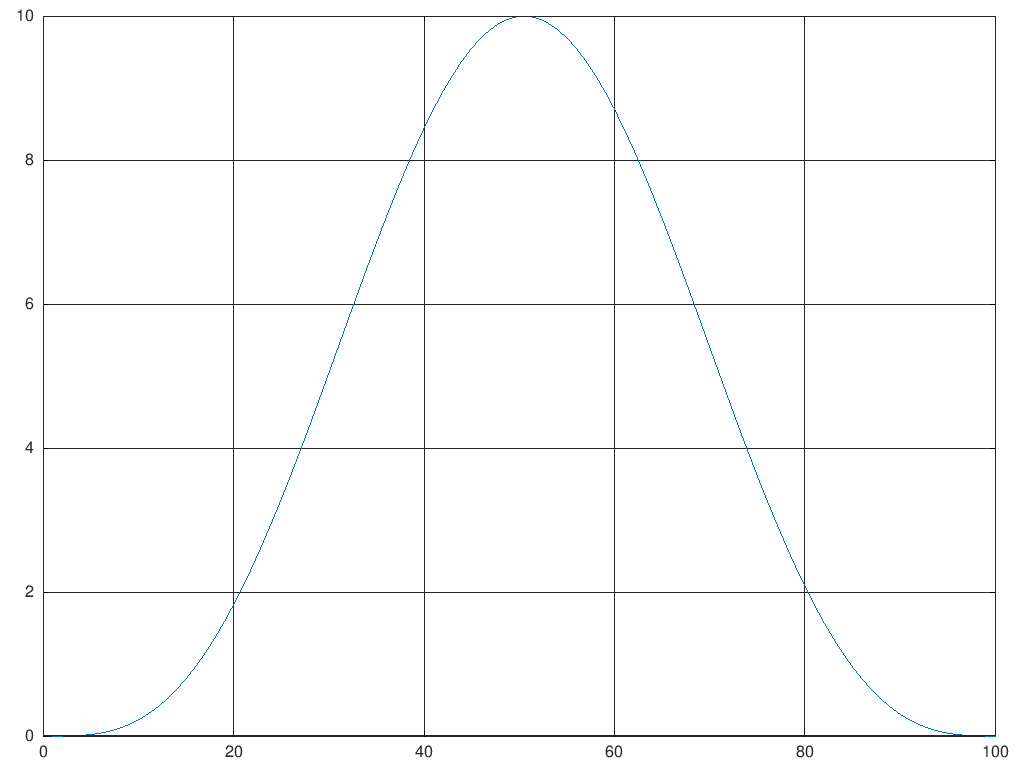

In [260]:
#Moving Window Average
window_width = 100;

weigths = 10.*sin(pi().*linspace(0,1,window_width)).*(1.-cos(2.*pi().*linspace(0,1,window_width)))./2;

wavg_a = int32(my_weightedmovingavrg(tsig1,window_width,weigths));
wavg_b = int32(my_weightedmovingavrg(tsig2,window_width,weigths));
wavg_c = int32(my_weightedmovingavrg(tsig3,window_width,weigths));
wavg_d = int32(my_weightedmovingavrg(tsig4,window_width,weigths));
wavg_e = int32(my_weightedmovingavrg(tsig5,window_width,weigths));
wavg_f = int32(my_weightedmovingavrg(tsig6,window_width,weigths));

figure(fignum++);
plot(weigths);
grid on;

### Sine

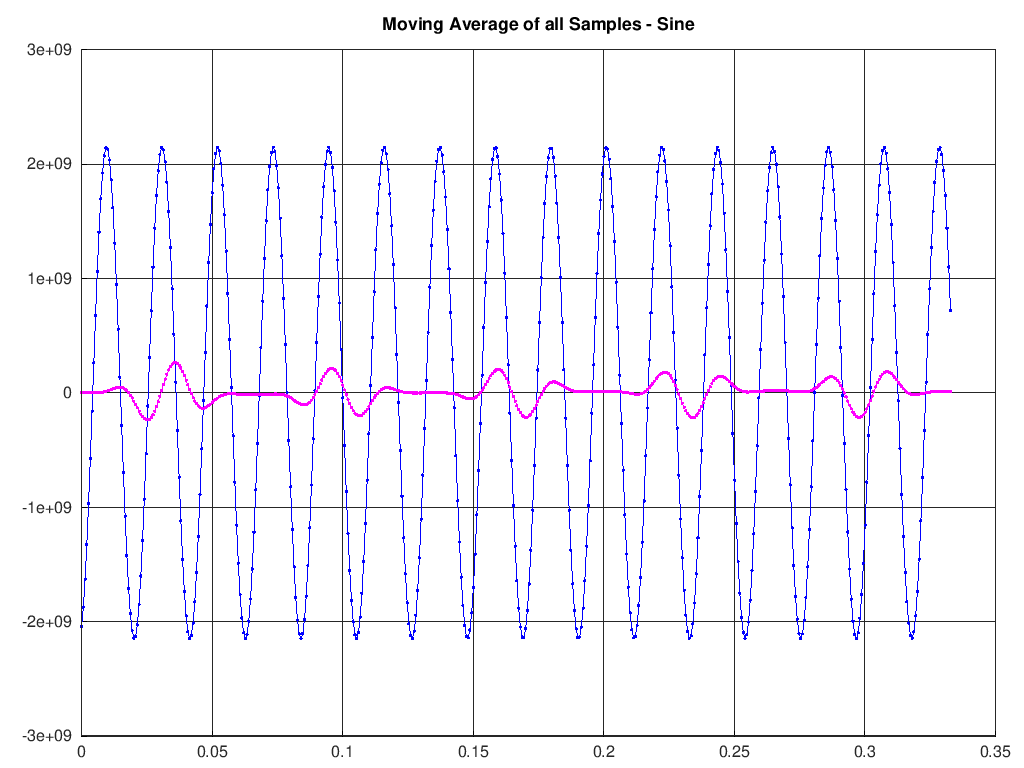

In [261]:
figure(fignum++);
hold on;
plot(t1,tsig1,"- . b");
plot(t1,wavg_a,"- . m");
hold off;
title("Moving Average of all Samples - Sine");
grid on;

### Noise

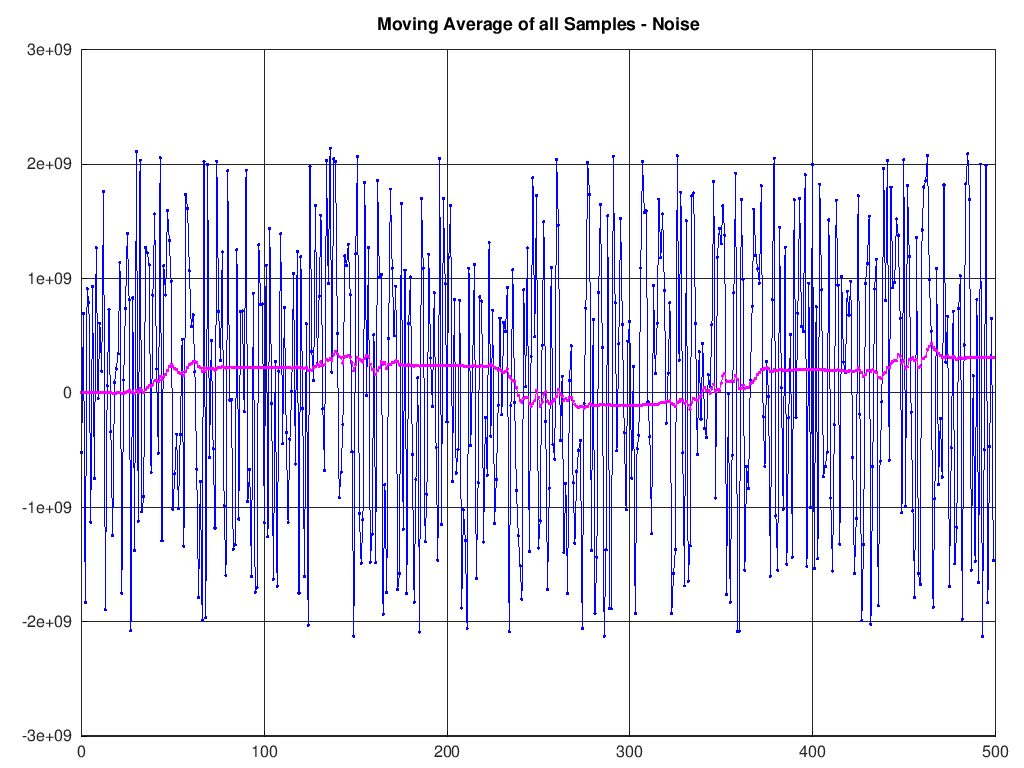

In [262]:
figure(fignum++);
hold on;
plot(t2,tsig2,"- . b");
plot(t2,wavg_b,"- . m");
hold off;
title("Moving Average of all Samples - Noise");
grid on;

### Triangles

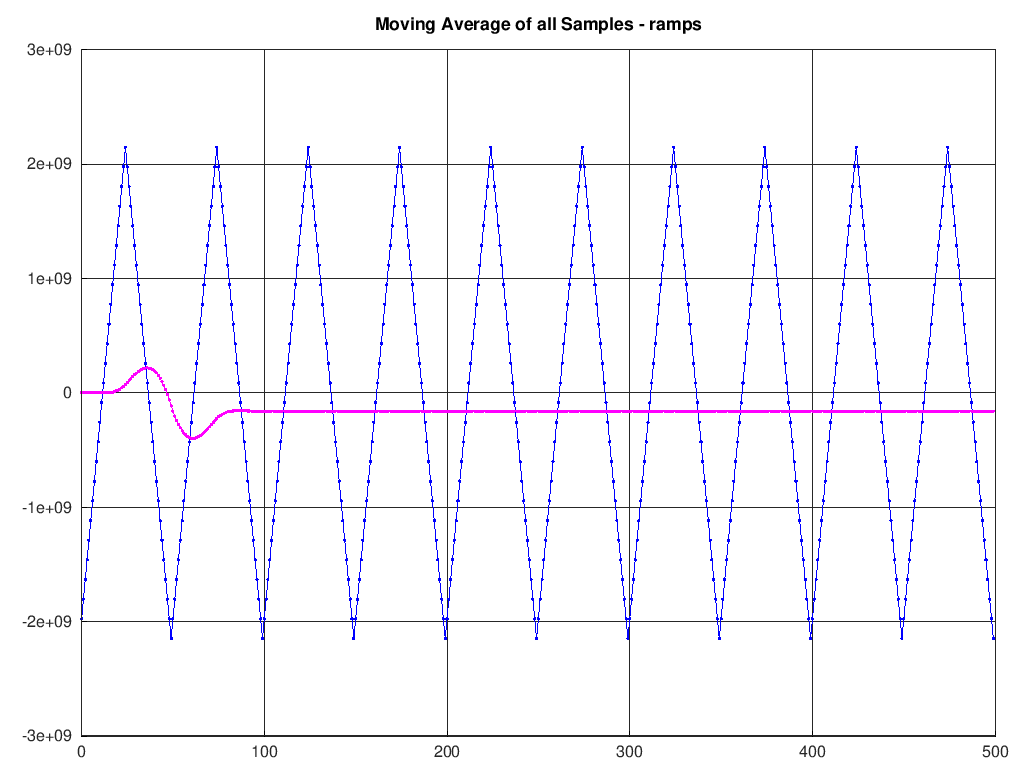

In [263]:
figure(fignum++);
hold on;
plot(t3,tsig3,"- . b");
plot(t3,wavg_c,"- . m");
hold off;
title("Moving Average of all Samples - ramps");
grid on;

### Rectangular

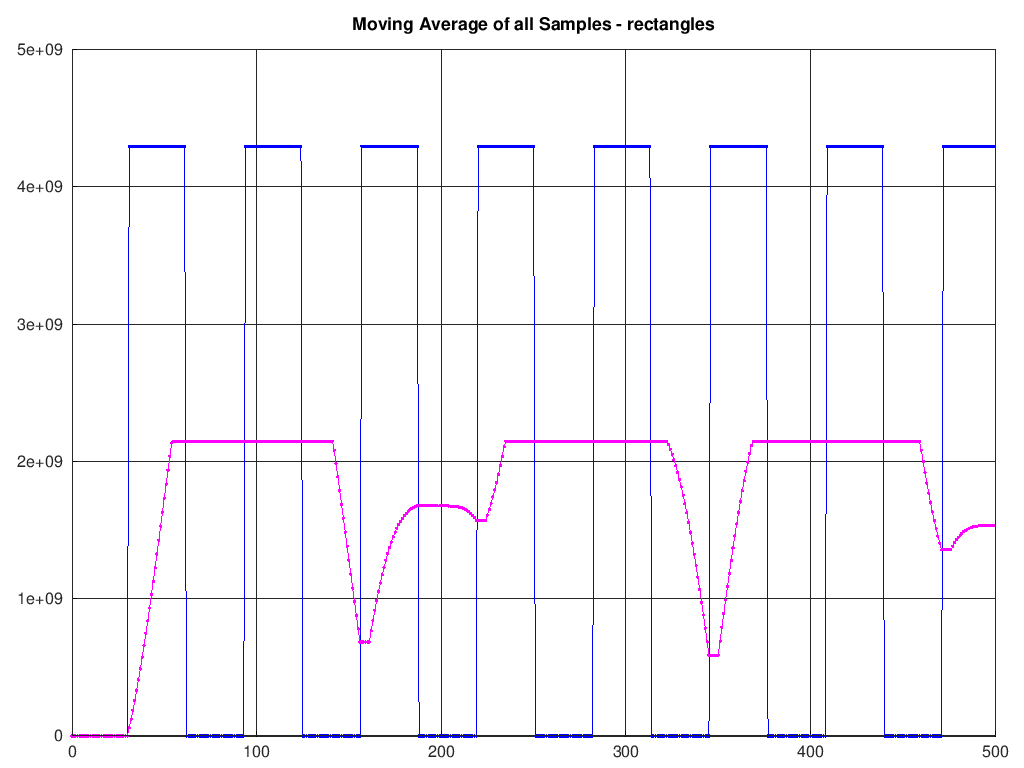

In [264]:
figure(fignum++);
hold on;
plot(t4,tsig4,"- . b");
plot(t4,wavg_d,"- . m");
hold off;
title("Moving Average of all Samples - rectangles");
grid on;

### Sawtooth

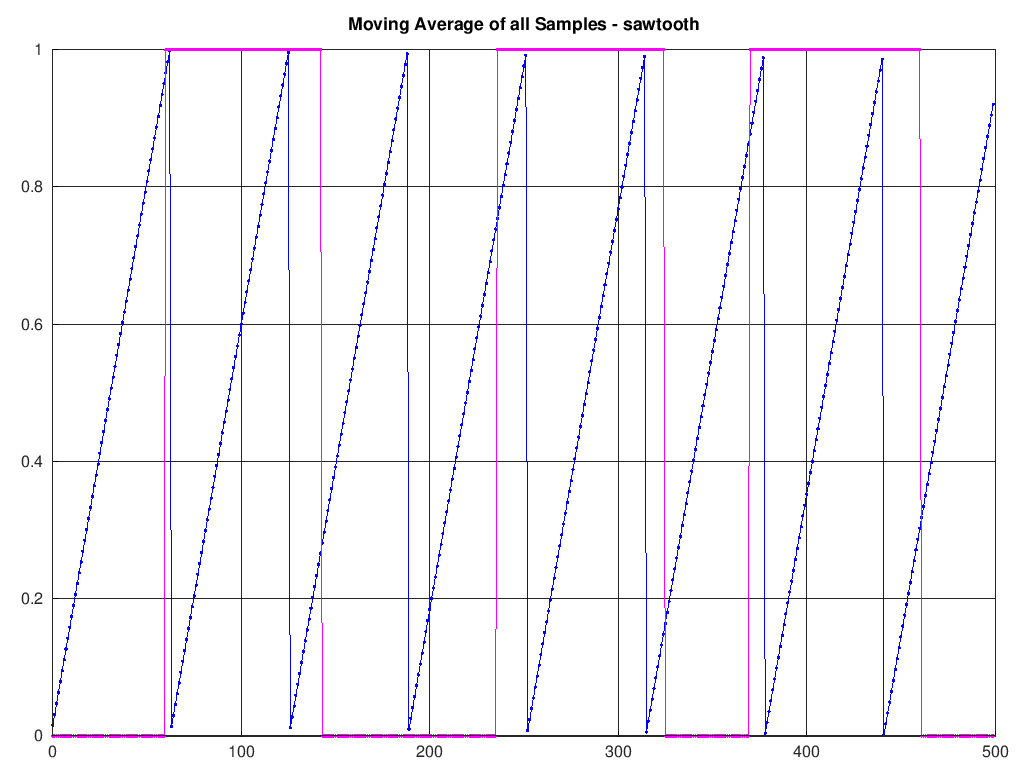

In [265]:
figure(fignum++);
hold on;
plot(t5,tsig5,"- . b");
plot(t5,wavg_e,"- . m");
hold off;
title("Moving Average of all Samples - sawtooth");
grid on;

### Sine + Noise

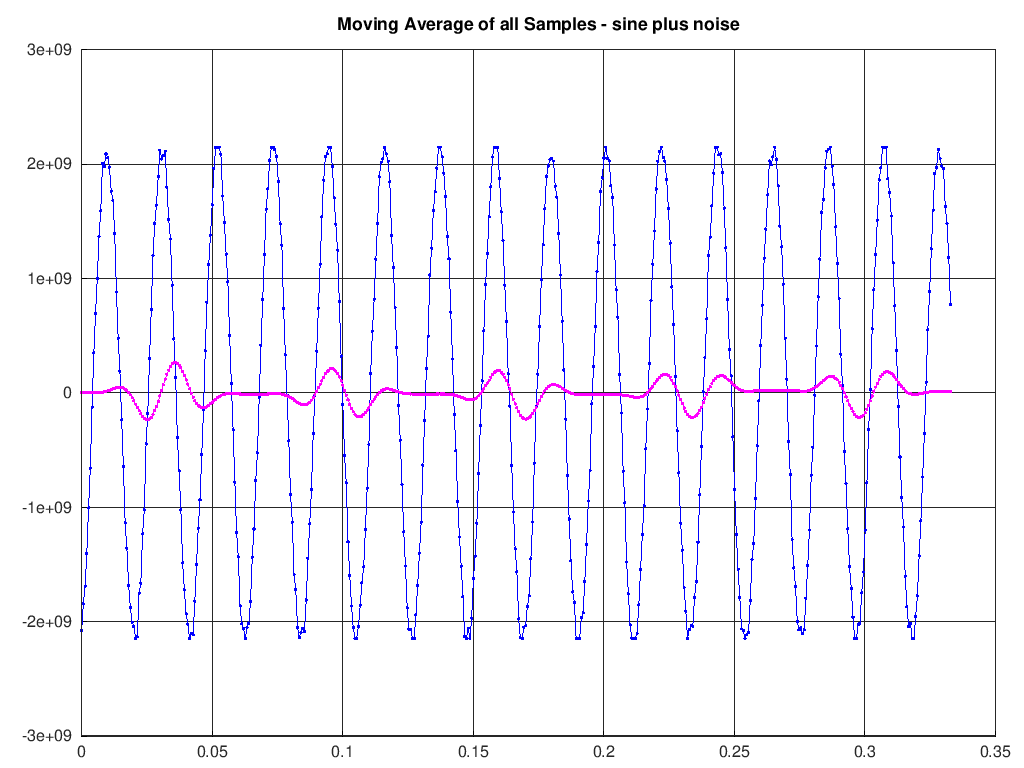

In [266]:
figure(fignum++);
hold on;
plot(t6,tsig6,"- . b");
plot(t6,wavg_f,"- . m");
hold off;
title("Moving Average of all Samples - sine plus noise");
grid on;

## Fast moving Average - optimized for small embeddend µC Systems

only using bitshifts (as replacement for multiply and divide) and addition/substraction

In [267]:
#Todo: Manage sign's

In [268]:
%%file my_fast_movavrg.m

function result=my_fast_movavrg(data,fac)
  tmp=zeros(size(data));
  tmp(:,1)=data(:,1);
  len=length(data);    
  tmp(2:len) = (data(2:len).-data(1:(len.-1))).+bitshift(data(1:(len.-1)),fac);
  result = bitshift(tmp,-fac);
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_fast_movavrg.m'.


In [269]:
frac = 26;

favg_a = int32(my_fast_movavrg(tsig1,frac));
favg_b = int32(my_fast_movavrg(tsig2,frac));
favg_c = int32(my_fast_movavrg(tsig3,frac));
favg_d = int32(my_fast_movavrg(tsig4,frac));
favg_e = int32(my_fast_movavrg(tsig5,frac));
favg_f = int32(my_fast_movavrg(tsig6,2));

### Sine

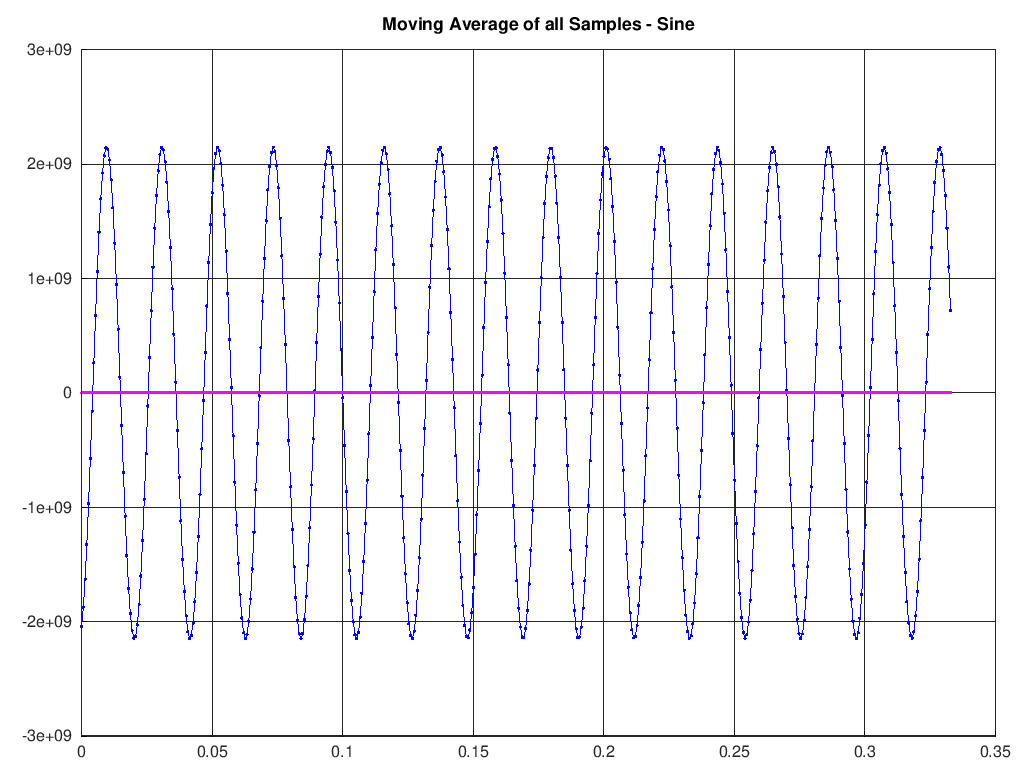

In [270]:
figure(fignum++);
hold on;
plot(t1,tsig1,"- . b");
plot(t1,favg_a,"- . m");
hold off;
title("Moving Average of all Samples - Sine");
grid on;

### Noise

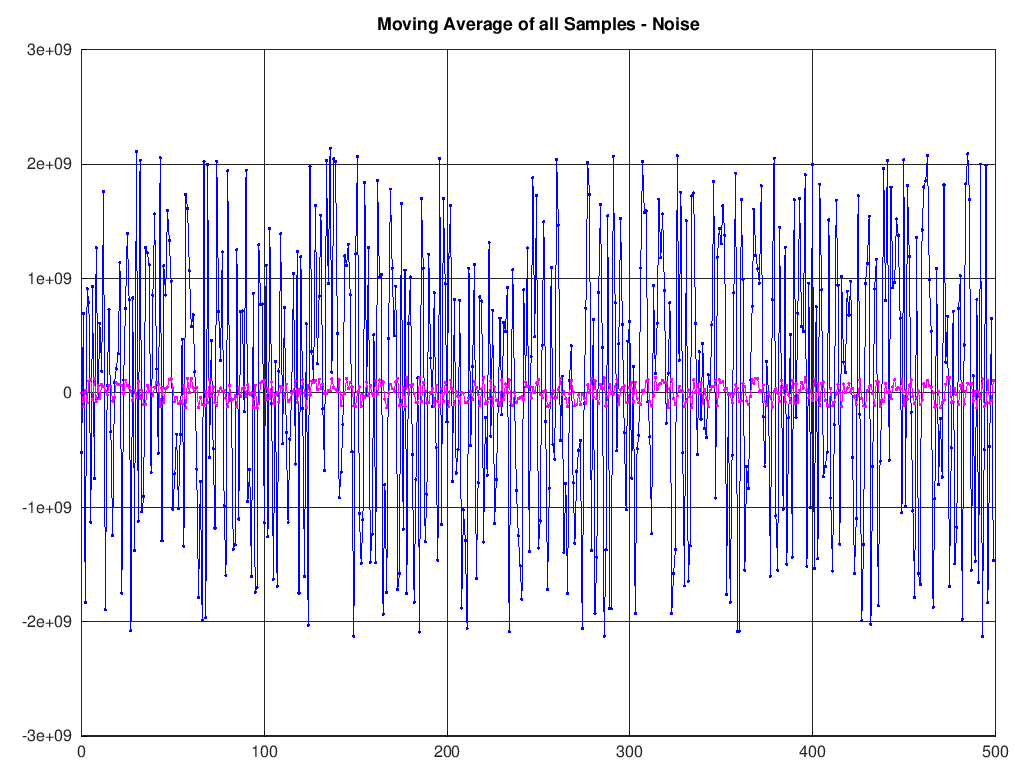

In [271]:
figure(fignum++);
hold on;
plot(t2,tsig2,"- . b");
plot(t2,favg_b,"- . m");
hold off;
title("Moving Average of all Samples - Noise");
grid on;

### Triangle

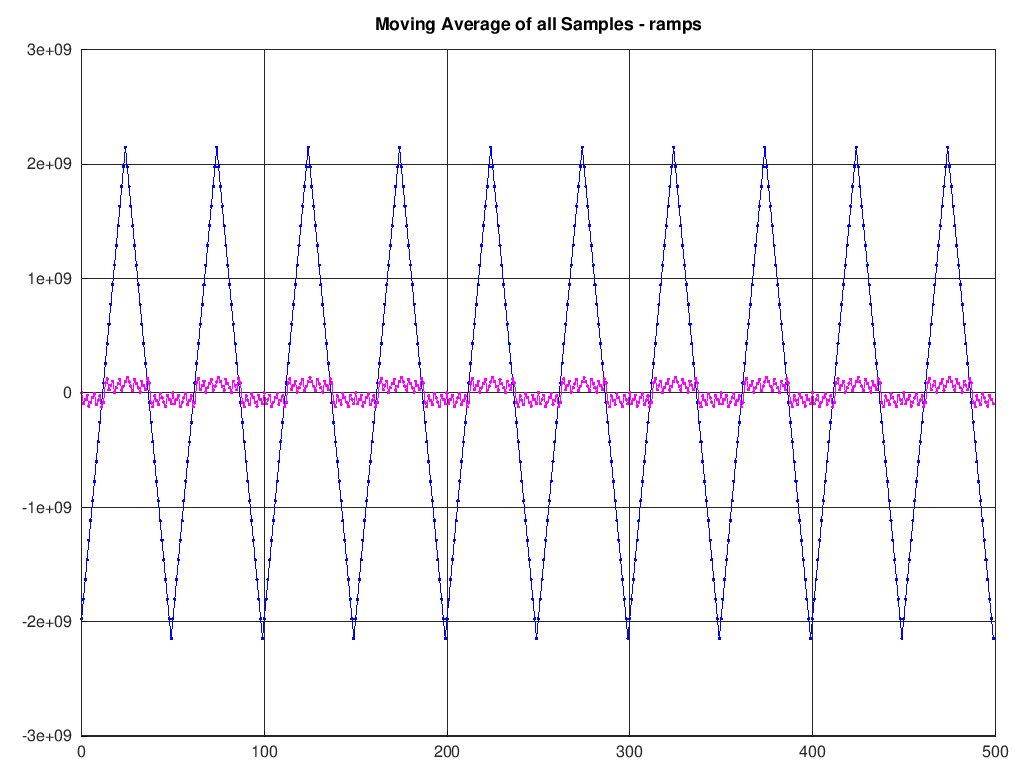

In [272]:
figure(fignum++);
hold on;
plot(t3,tsig3,"- . b");
plot(t3,favg_c,"- . m");
hold off;
title("Moving Average of all Samples - ramps");
grid on;

### Rectangular

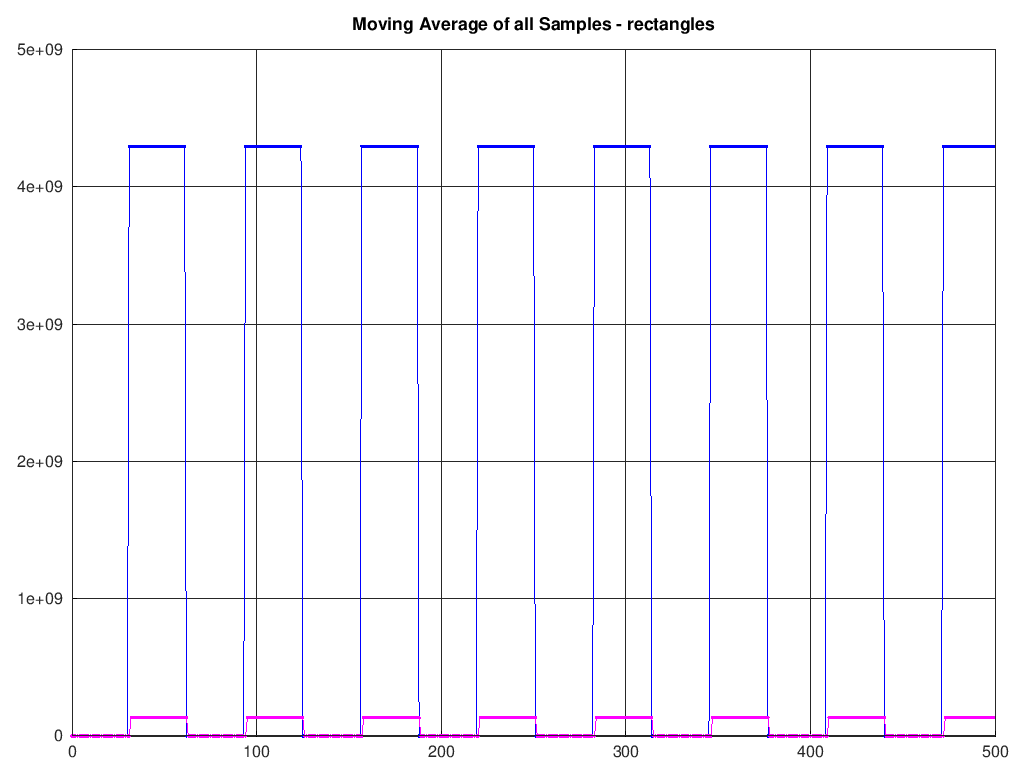

In [273]:
figure(fignum++);
hold on;
plot(t4,tsig4,"- . b");
plot(t4,favg_d,"- . m");
hold off;
title("Moving Average of all Samples - rectangles");
grid on;

### Sawtooth

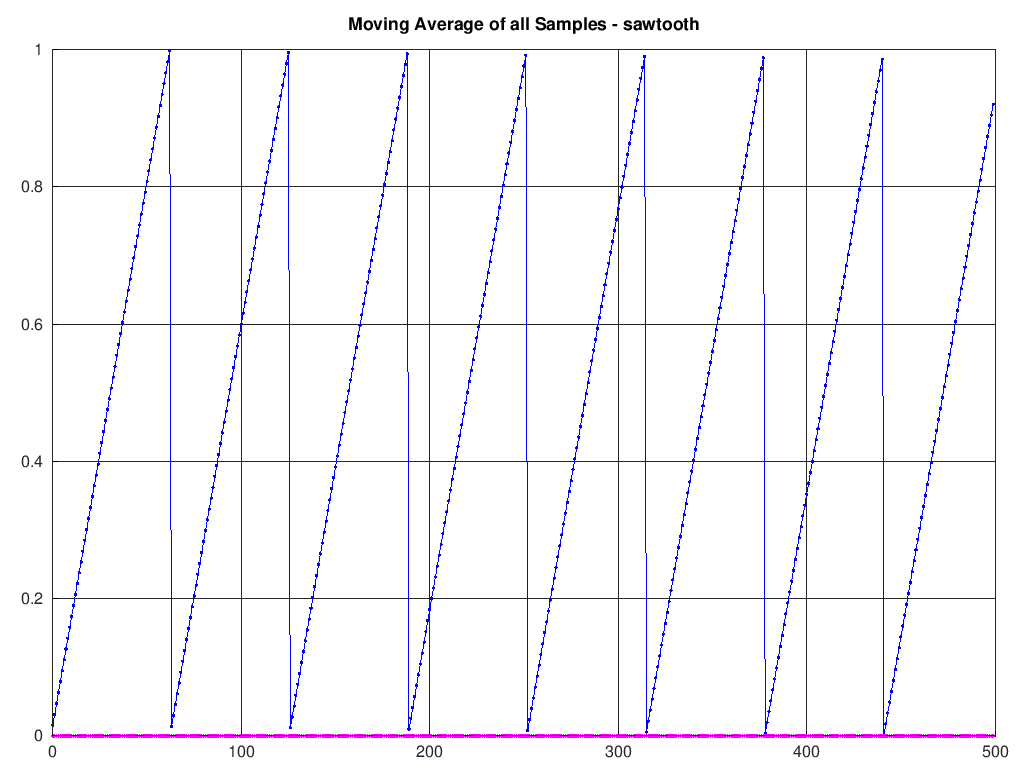

In [274]:
figure(fignum++);
hold on;
plot(t5,tsig5,"- . b");
plot(t5,favg_e,"- . m");
hold off;
title("Moving Average of all Samples - sawtooth");
grid on;

### Sine + Noise

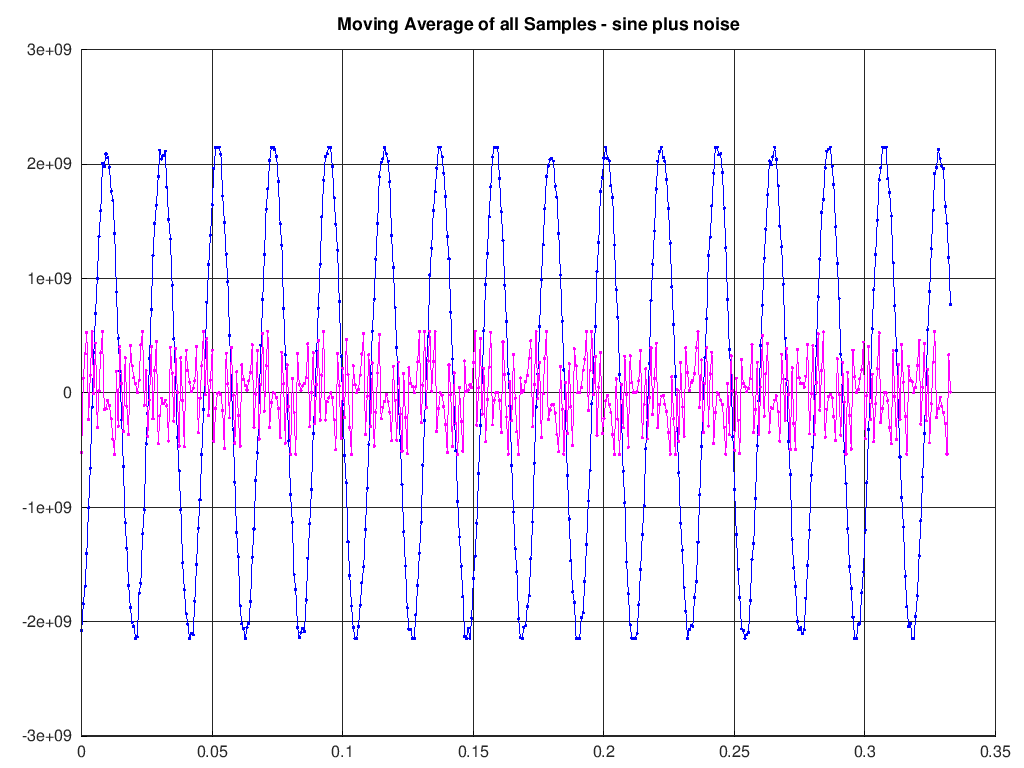

In [275]:
figure(fignum++);
hold on;
plot(t6,tsig6,"- . b");
plot(t6,favg_f,"- . m");
hold off;
title("Moving Average of all Samples - sine plus noise");
grid on;

## Moving Mean 1

In [184]:
%%file my_movavrg_1.m

function result=my_movavrg_1(data,fac)
  xmean=zeros(1,nos);
  for(ii=1:1:(nos.-1))
    m_var = xmean(:,ii);  
    d_var = data(:,ii);
    if(d_var > m_var)
      m_tmp = (d_var.-m_var)./2;
    else
      m_tmp = -1.*(m_var.-d_var)./2;
    endif  
    next=ii.+1;
    xmean(:,next) = m_var.+(m_tmp./window_width);
  endfor
endfunction

error: 'data' undefined near line 3 column 11


In [185]:
frac = 26;

favg_a = int32(my_fast_movavrg(tsig1,frac));
favg_b = int32(my_fast_movavrg(tsig2,frac));
favg_c = int32(my_fast_movavrg(tsig3,frac));
favg_d = int32(my_fast_movavrg(tsig4,frac));
favg_e = int32(my_fast_movavrg(tsig5,frac));
favg_f = int32(my_fast_movavrg(tsig6,2));

### Sine

error: 'data' undefined near line 1 column 6


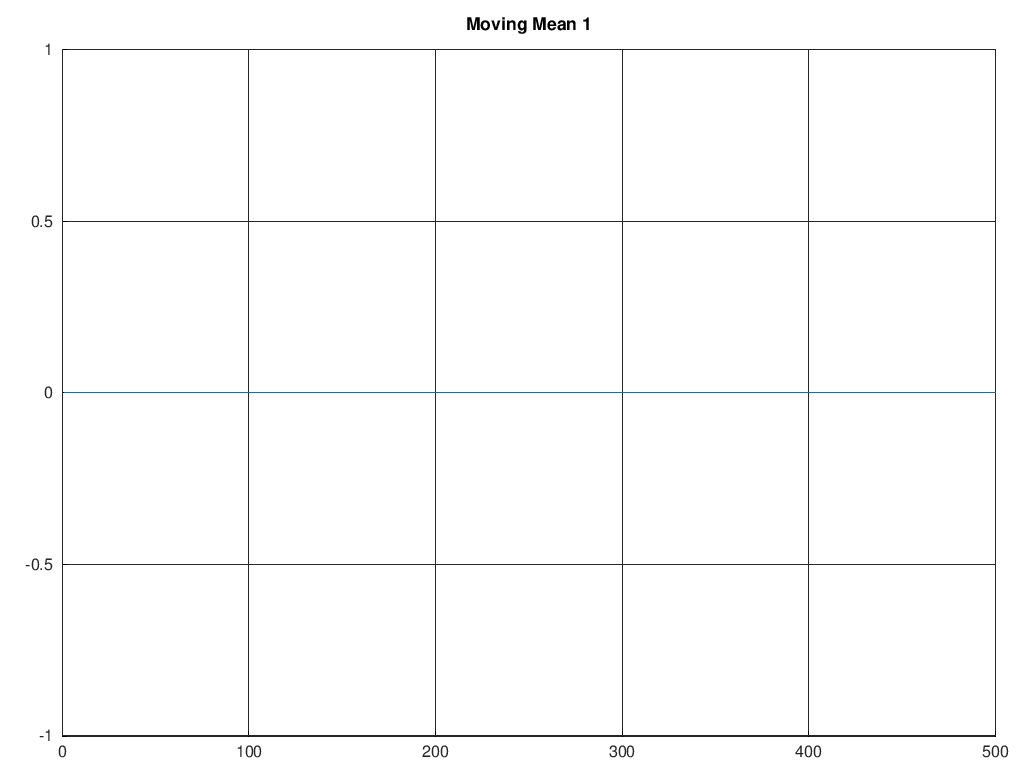

In [186]:
figure(fignum++);
hold on;
plot(data);
plot(xmean);
hold off;
title("Moving Mean 1");
grid on;

In [187]:
#
#-----
#

In [188]:
ymean=zeros(1,nos);
for(ii=1:1:(nos.-1))  
  ymean(:,ii+1) = ymean(:,ii) .+ ((data(:,ii).-ymean(:,ii))./window_width);
endfor

error: 'data' undefined near line 2 column 36


error: 'data' undefined near line 1 column 6


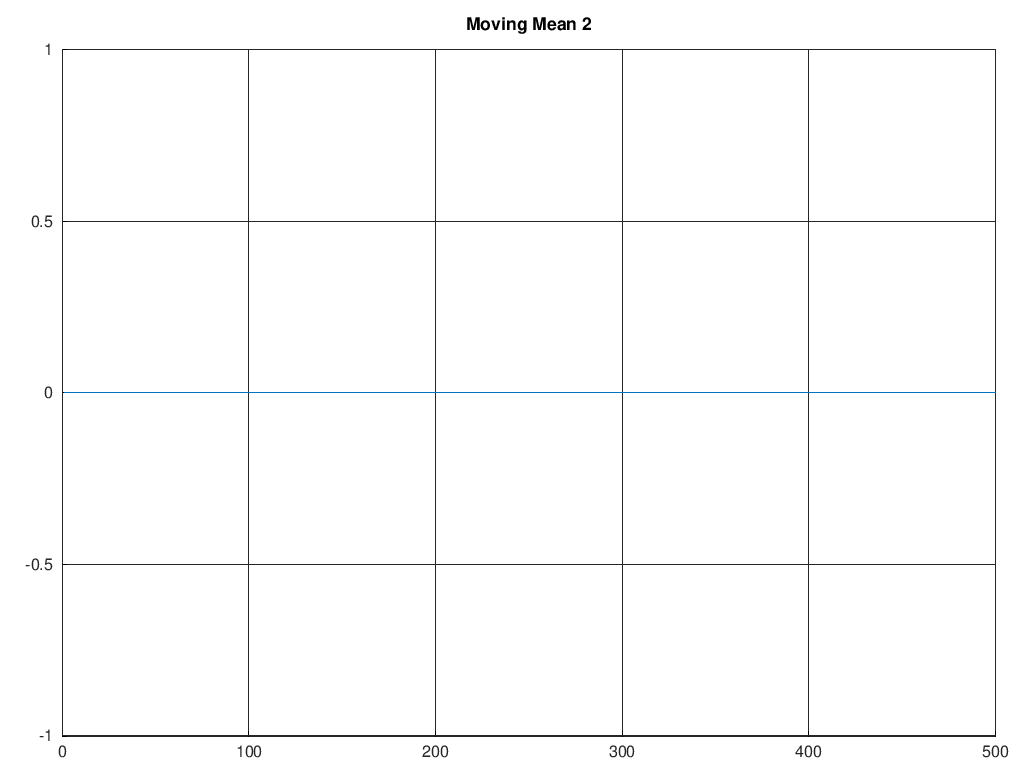

In [189]:
figure(fignum++);
hold on;
plot(data);
plot(ymean);
hold off;
title("Moving Mean 2");
grid on;

In [190]:
#
#----- T R A S H
#

## Averaging functions

### simple average

In [191]:
#Average
avg_a = int32(sum(tsig1)./length(tsig1));
avg_b = int32(sum(tsig2)./length(tsig2));
avg_c = int32(sum(tsig3)./length(tsig3));
avg_d = int32(sum(tsig4)./length(tsig4));
avg_e = int32(sum(tsig5)./length(tsig5));
avg_f = int32(sum(tsig6)./length(tsig6));

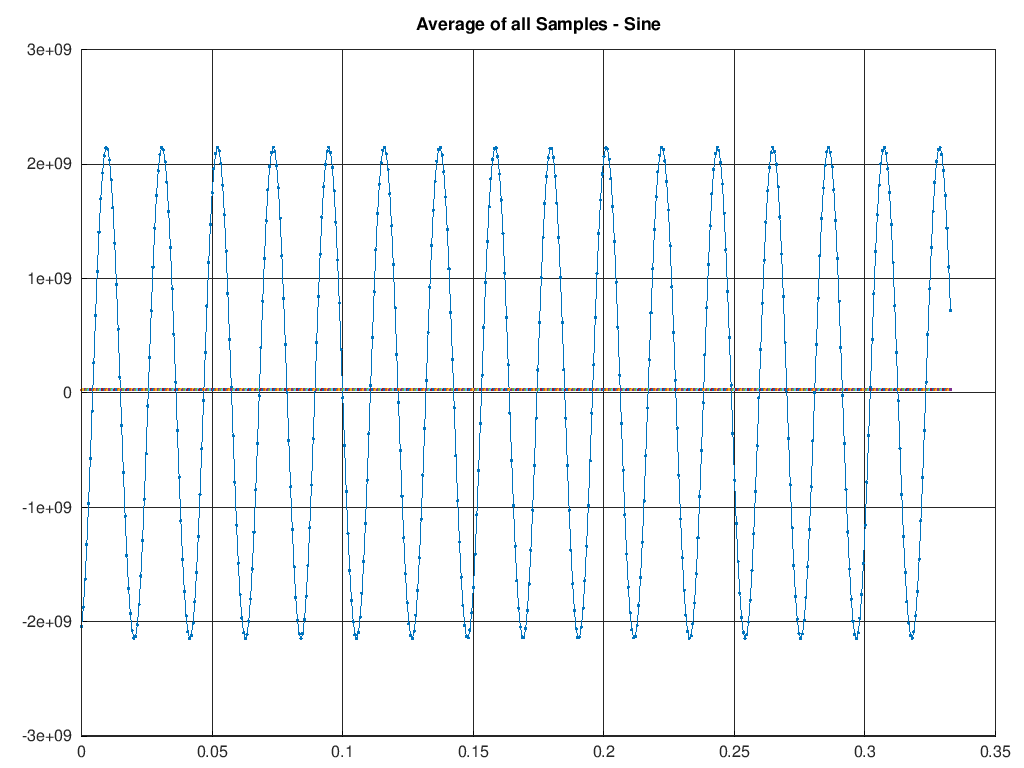

In [192]:
figure(fignum++);
hold on;
plot(t1,tsig1,". -");
plot(t1,avg_a);
hold off;
title("Average of all Samples - Sine");
grid on;

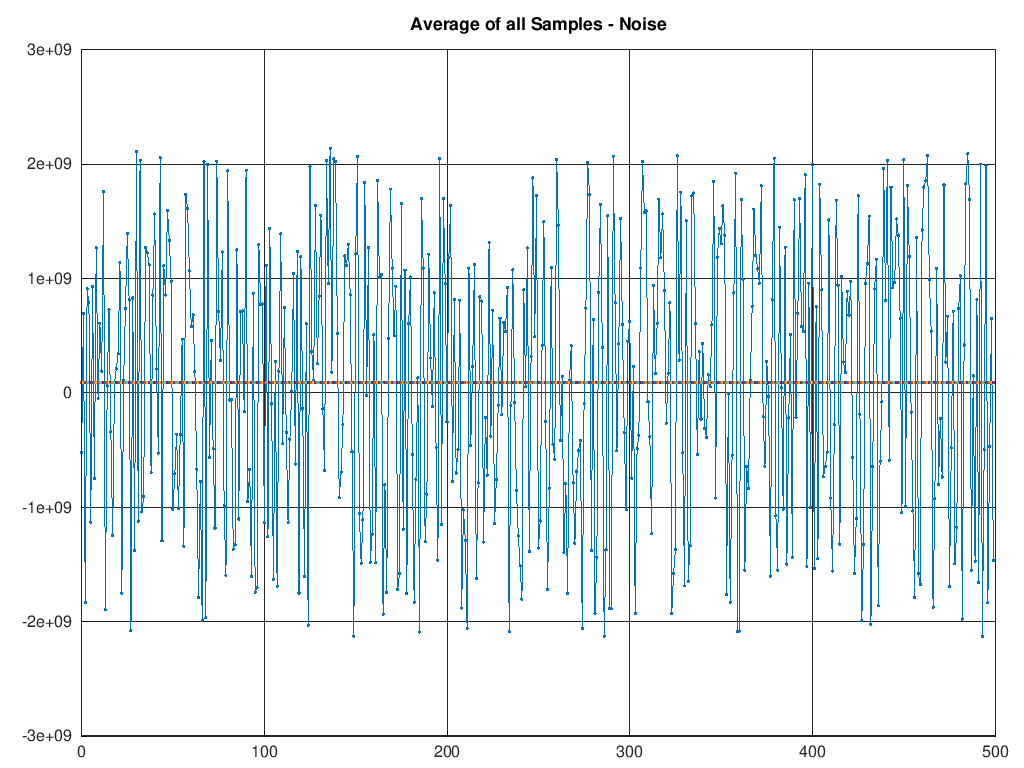

In [193]:
figure(fignum++);
hold on;
plot(t2,tsig2,". -");
plot(t2,avg_b);
hold off;
title("Average of all Samples - Noise");
grid on;

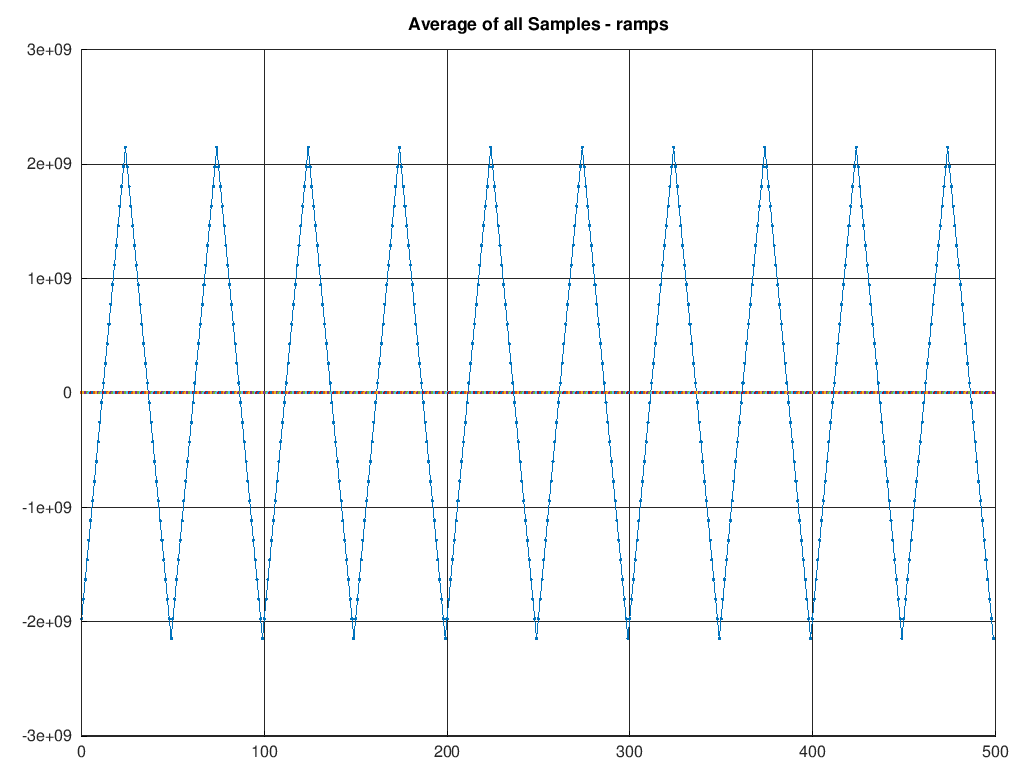

In [194]:
figure(fignum++);
hold on;
plot(t3,tsig3,". -");
plot(t3,avg_c);
hold off;
title("Average of all Samples - ramps");
grid on;

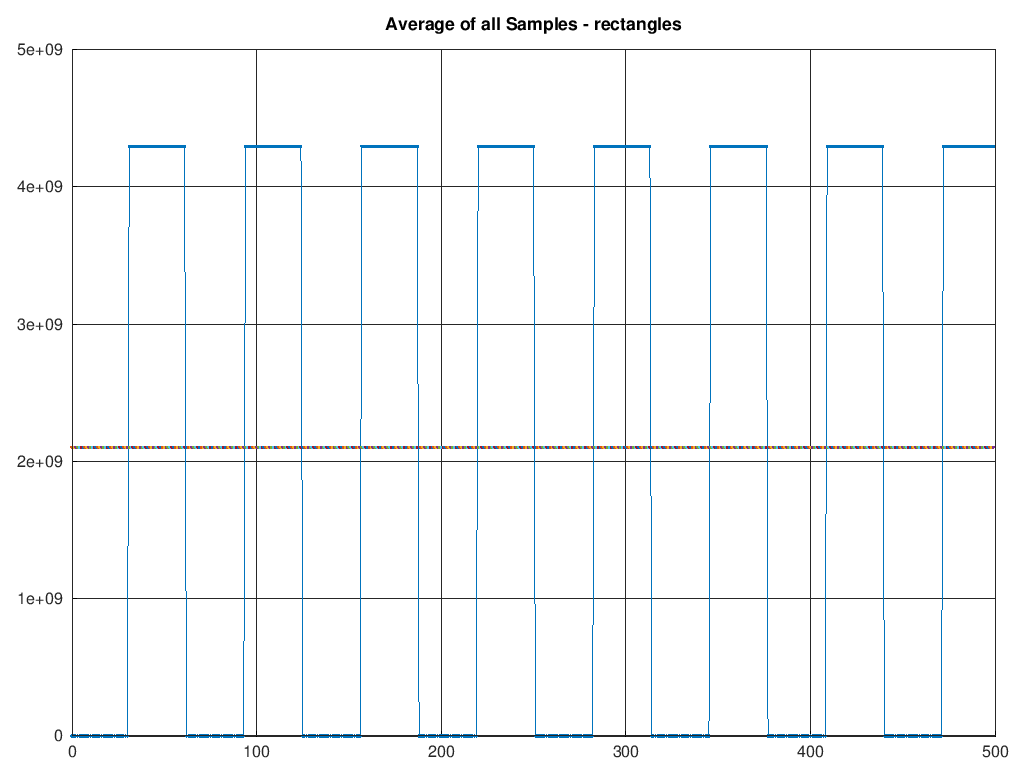

In [195]:
figure(fignum++);
hold on;
plot(t4,tsig4,". -");
plot(t4,avg_d);
hold off;
title("Average of all Samples - rectangles");
grid on;